In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Test DFT and IDFT

We take a simple signal $f$ and we apply a Discrete Fourier Transform (**DFT**) to retrieve its frequencies. We then use the Inverse Discrete Fourier Transform (**IDFT**) to recompose the signal from its frequencies.

## The signal

In [2]:
def gauss(t):
        return np.exp(- np.pi*(t**2))

In [3]:
# Arguments
dt = .1 # sample spacing (distance between two adjacent samples)

N = 250 # sample size (N/2 is the number the positive frequencies)

T = np.linspace(-N*dt/2, N*dt/2, N) # The time sample
x = np.array( [gauss(t) for t in T] ) # The signal sample

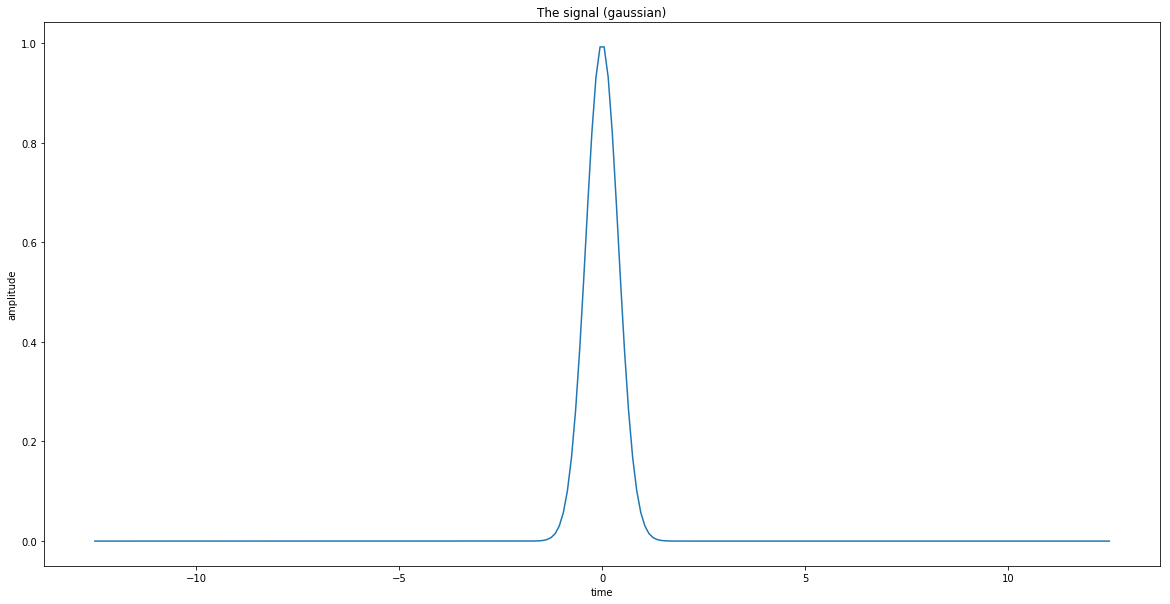

In [4]:
plt.figure(figsize = (20, 10))
plt.title("The signal (gaussian)")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(T, x)

## DFT

https://en.wikipedia.org/wiki/Rectangular_function#Fourier_transform_of_the_rectangular_function

We use the DFT to get the amplitudes associated to the frequencies.

**Remark**:
a normalization is necessary before getting the true amplitudes.

In [5]:
X = np.fft.fft(x) # The amplitudes
X_half = np.fft.fftshift(X) # The amplitudes of the positive frequencies
Xi = np.fft.fftshift( np.fft.fftfreq(N, dt) ) # The frequencies sample (only positive ones)

<StemContainer object of 3 artists>

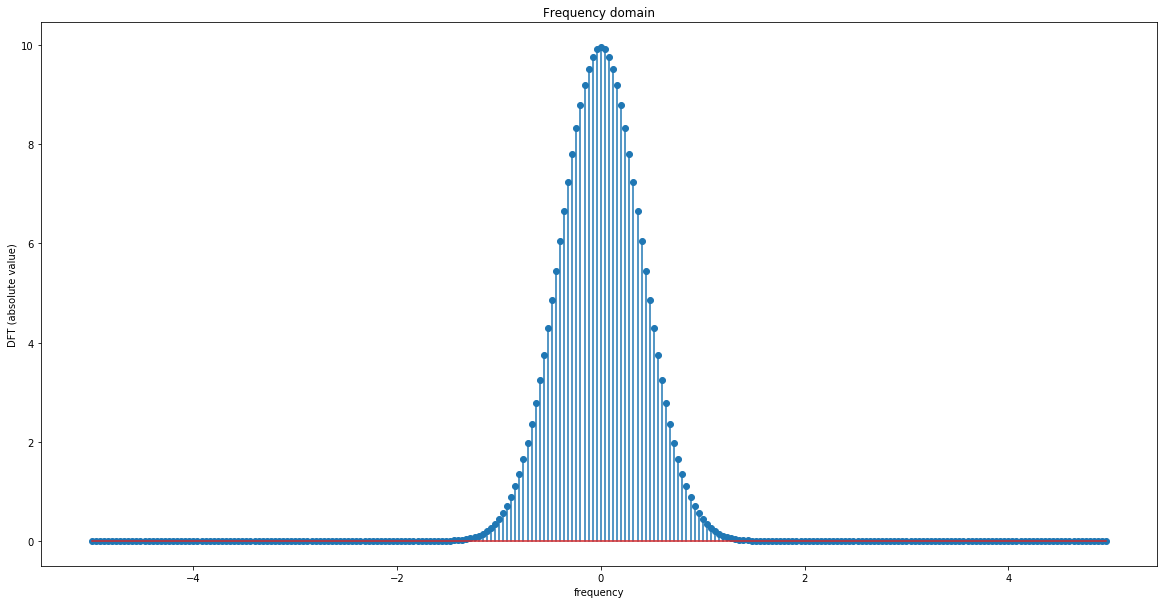

In [6]:
plt.figure(figsize = (20, 10))
plt.title("Frequency domain")
plt.xlabel("frequency")
plt.ylabel("DFT (absolute value)")
plt.stem(Xi, X_half.real)

We check that the peaks correspond to the frequencies of the signal:

## IDFT

From the amplitudes/values of the DFT we can recover the signal using the IDFT.

In [7]:
recovered_x = np.fft.ifft(X) # IDFT
error = np.abs(recovered_x.real - x) # we also compute the error between the original signal and the one returned by the IDFT

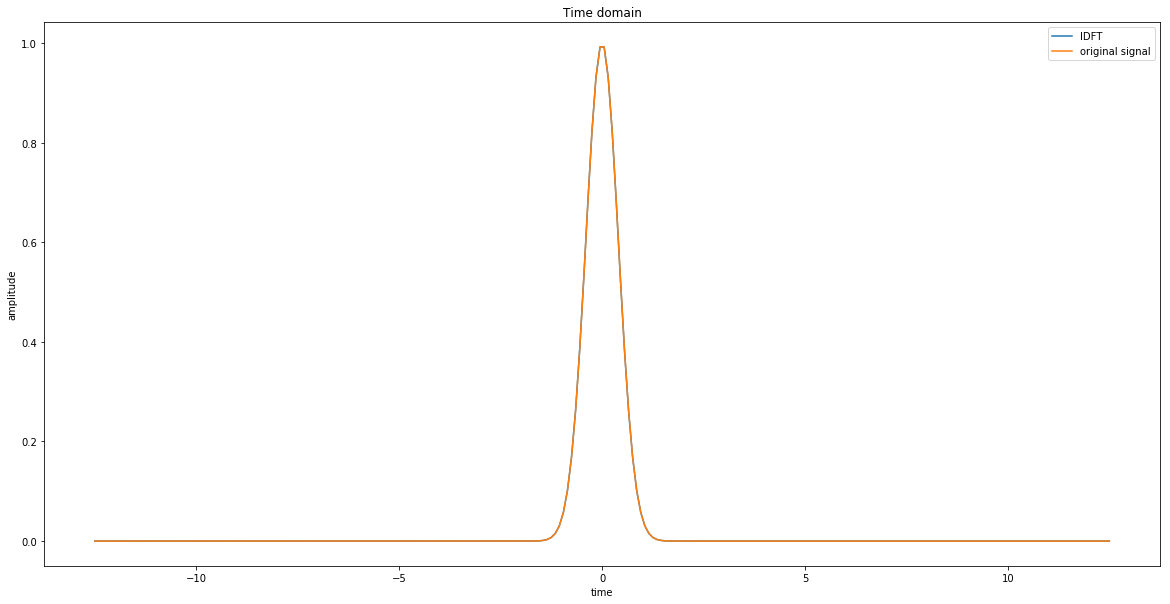

In [8]:
plt.figure( figsize = (20, 10) )
plt.plot(T, recovered_x.real, label = "IDFT")
plt.plot(T, x, label = "original signal")
plt.title("Time domain")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()

Maximum value of the error :  1.1368683772161613e-16


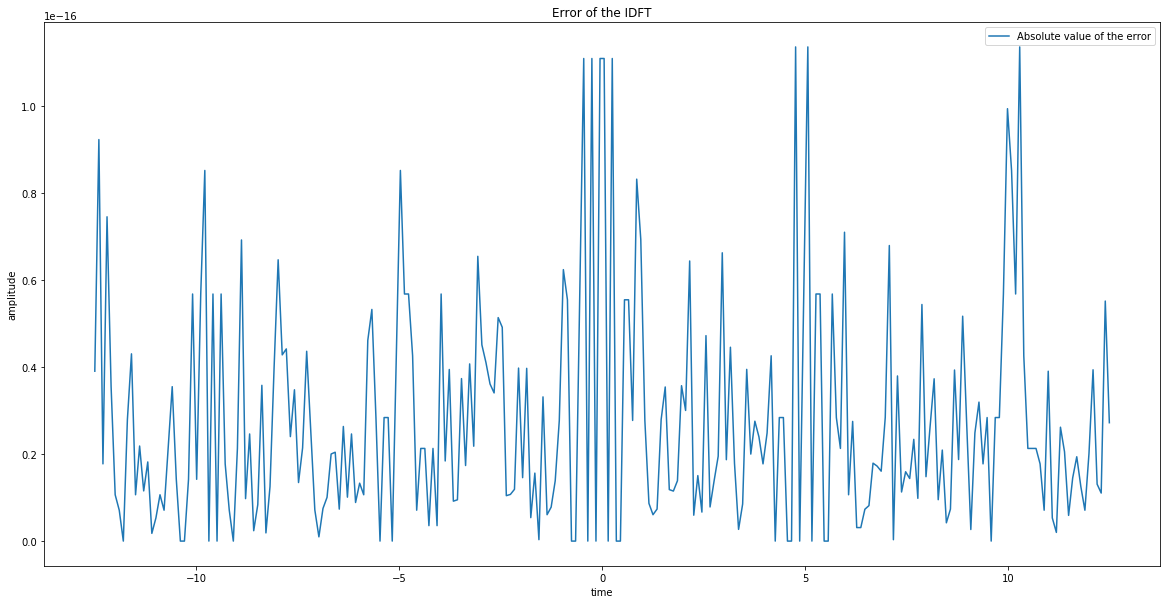

In [9]:
plt.figure( figsize = (20, 10) )
plt.plot(T, error, label = "Absolute value of the error")
plt.title("Error of the IDFT")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()
print("Maximum value of the error : ", np.amax(error))